#### Library Imports

In [877]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
import plotly.express as px
%matplotlib inline

#### Load the CSV Data

In [878]:
df = pd.read_csv('../../../../data/cardio_train.csv', delimiter=';')


# Data Meaning Type


The cardiovascular dataset consists of 11 features and 1 target variable. Attribute descriptions can be found on [Kaggle](https://www.kaggle.com/sulianova/cardiovascular-disease-dataset). They are provided below.

There are 3 types of input features in the data set.
- **Objective**: factual information
- **Examination**:  results from a medical examination
- **Subjective**:  response provided by patient



**Table 1: Cardiovascular Dataset - Attribute Descriptions**

| Column Description | Feature Type | Column Name | Data Type |
|:---|:---|:---|:---|
| **Age**                        | Objective | age | int (days) |
| **Height**                     | Objective | height | int (cm) |
| **Weight**                     | Objective | weight | float (kg) |
| **Gender**                     | Objective | gender | 1: female, 2: male |
| **Systolic blood pressure**    | Examination | ap_hi | int |
| **Diastolic blood pressure**   | Examination | ap_lo | int |
| **Cholesterol**                | Examination | cholesterol | 1: normal, 2: above normal, 3: well above normal |
| **Glucose**                    | Examination | gluc | 1: normal, 2: above normal, 3: well above normal |
| **Smoking**                    | Subjective | smoke | binary |
| **Alcohol intake**             | Subjective | alco | binary |
| **Physical activity**          | Subjective | active | binary |
| **Has CVD?**                   | Target | cardio | binary |

In [879]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [880]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


We decided to use the `id` column as the index as it appears to be a unique identifier for the subject.

In [881]:
df.set_index("id", inplace=True)

In [882]:
df.index.is_unique

True

# Data Quality


## Identify Dimensions

In [883]:
df.shape

(70000, 12)

Our data set has `70 thousand` rows and `12` columns, which should work nicely for many of the machine learning classifiers we may attempt to utilize.

In [884]:
cols = df.columns

Store columns for later use.

In [885]:
cols

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

## Missing Values



In [886]:
df.isna().any()

age            False
gender         False
height         False
weight         False
ap_hi          False
ap_lo          False
cholesterol    False
gluc           False
smoke          False
alco           False
active         False
cardio         False
dtype: bool

There are no missing values in any of the columns of the default data.  But upon furhter inspection we found that zeros or other values may have been used in place of missing entries which should also be addressed.

## Duplicates


In [887]:
df.duplicated().any() 


True

There do appear to be missing values.

In [888]:
df.duplicated().sum()

24

There were a total of `24` sets where all columns of an observation equal at least one other record in the set. It was important to remove `id` as part of the data frame otherwise these duplicated entries would have been more difficult to detect.

In [889]:
duplicated = df[df.duplicated(keep=False)].sort_values(by=['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'])

In [890]:
duplicated

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
9004,14552,1,158,64.0,120,80,1,1,0,0,1,0
57690,14552,1,158,64.0,120,80,1,1,0,0,1,0
24435,16160,1,168,65.0,120,80,1,1,0,0,1,1
91592,16160,1,168,65.0,120,80,1,1,0,0,1,1
1685,16793,1,165,68.0,120,80,1,1,0,0,1,0
31110,16793,1,165,68.0,120,80,1,1,0,0,1,0
40450,16805,1,157,67.0,120,80,1,1,0,0,1,0
86345,16805,1,157,67.0,120,80,1,1,0,0,1,0
14974,16937,2,170,70.0,120,80,1,1,0,0,0,0


In [891]:
df_clean = df.copy(deep=True)

In [892]:
df_clean.drop_duplicates(inplace=True)

We'll remove the duplicates entirely, as this should not affect the ability of our models to make predictions with the amount of observations at our disposal. 


## Transformations

In [893]:
# %%time
# df_clean['age'] = df_clean['age'].apply(lambda x: round(x / 365))
df_clean['age'] = (df_clean['age'] / 365).round().astype('int')

`Age` was provided in `days`, and for the sake of interpretability we'll be converting this to years for all observations.

In [894]:
df_clean["gender"].value_counts()
# df_clean["smoke"].value_counts()
# df_clean["alco"].value_counts()
# df_clean["active"].value_counts()
# df_clean["cardio"].value_counts()

1    45509
2    24467
Name: gender, dtype: int64

In [895]:
# df_clean = pd.get_dummies(df_clean, columns=['gender'], drop_first=True)
# df_clean = pd.get_dummies(df_clean, columns=['gender'])

df_clean['gender'] = np.where((df_clean.gender == 2), True, False)
df_clean['smoke'] = np.where((df_clean.smoke == 1), True, False)
df_clean['alco'] = np.where((df_clean.alco == 1), True, False)
df_clean['active'] = np.where((df_clean.active == 1), True, False)
df_clean['cardio'] = np.where((df_clean.cardio == 1), True, False)

In [896]:
df_clean.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,50,True,168,62.0,110,80,1,1,False,False,True,False
1,55,False,156,85.0,140,90,3,1,False,False,True,True
2,52,False,165,64.0,130,70,3,1,False,False,False,True
3,48,True,169,82.0,150,100,1,1,False,False,True,True
4,48,False,156,56.0,100,60,1,1,False,False,False,False


In [897]:
# df_clean.rename(columns={"gender_2": "gender"}, inplace=True)
# df_clean.rename(columns={"gender_1": "female", "gender_2": "male"}, inplace=True)

## Outliers

In [898]:
plt.style.use('ggplot')

### Continuous Variables

#### Age

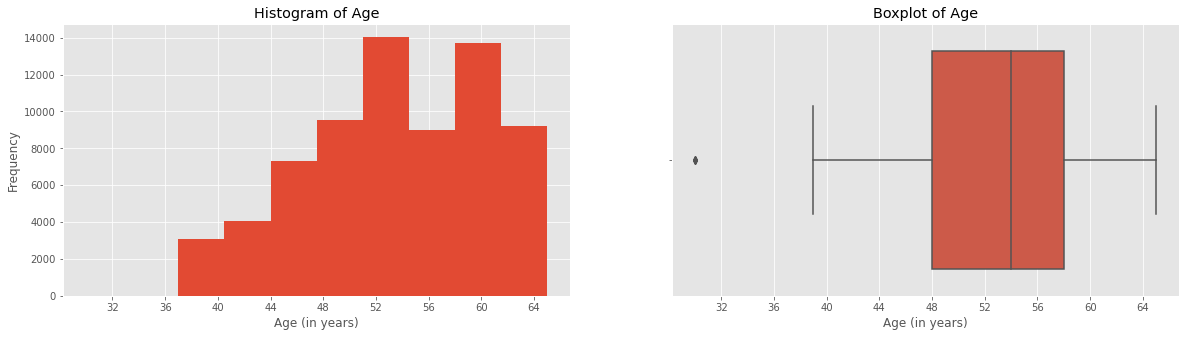

In [899]:

fig_1 = plt.figure(1, figsize=(20, 5))

chart_1 = fig_1.add_subplot(121)
chart_2 = fig_1.add_subplot(122)

chart_1.hist(df_clean["age"])
chart_1.xaxis.set_major_locator(MaxNLocator(integer=True))
chart_1.set_title('Histogram of Age')
chart_1.set_xlabel('Age (in years)')
chart_1.set_ylabel('Frequency')

sns.boxplot(x="age", data=df_clean, ax=chart_2)
chart_2.xaxis.set_major_locator(MaxNLocator(integer=True))
chart_2.set_title('Boxplot of Age')
chart_2.set_xlabel('Age (in years)')


plt.show()

`Age` has relatively few outliers but is slightly right-skewed.

#### Height

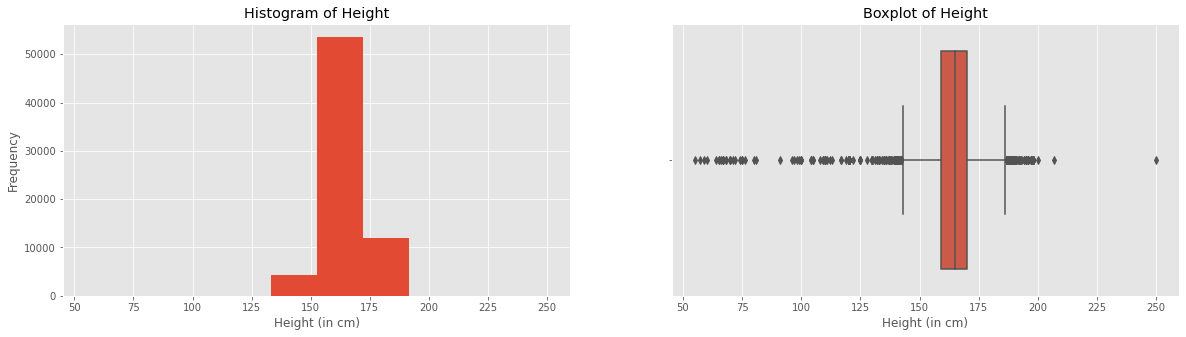

In [900]:

fig_2 = plt.figure(1, figsize=(20, 5))

chart_1 = fig_2.add_subplot(121)
chart_2 = fig_2.add_subplot(122)

chart_1.hist(df_clean["height"])
chart_1.xaxis.set_major_locator(MaxNLocator(integer=True))
chart_1.set_title('Histogram of Height')
chart_1.set_xlabel('Height (in cm)')
chart_1.set_ylabel('Frequency')

sns.boxplot(x="height", data=df_clean, ax=chart_2)
chart_2.xaxis.set_major_locator(MaxNLocator(integer=True))
chart_2.set_title('Boxplot of Height')
chart_2.set_xlabel('Height (in cm)')


plt.show()

There are quite a few outliers in the height column that should be addressed.  The largest of 250cm is over 8 feet tall and appears to be an error.

#### Weight

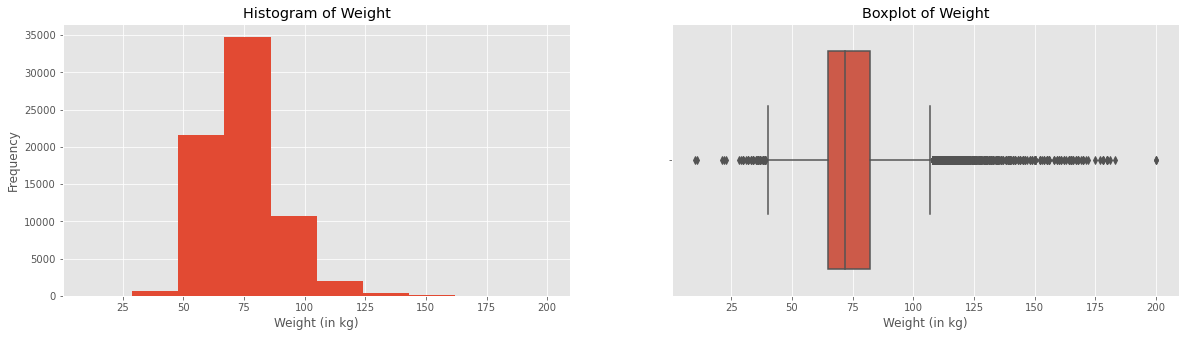

In [901]:

fig_3 = plt.figure(1, figsize=(20, 5))

chart_1 = fig_3.add_subplot(121)
chart_2 = fig_3.add_subplot(122)

chart_1.hist(df_clean["weight"])
chart_1.xaxis.set_major_locator(MaxNLocator(integer=True))
chart_1.set_title('Histogram of Weight')
chart_1.set_xlabel('Weight (in kg)')
chart_1.set_ylabel('Frequency')

sns.boxplot(x="weight", data=df_clean, ax=chart_2)
chart_2.xaxis.set_major_locator(MaxNLocator(integer=True))
chart_2.set_title('Boxplot of Weight')
chart_2.set_xlabel('Weight (in kg)')


plt.show()

Similarly, there are a lot of outliers in the weight column as well.

#### Systolic blood pressure (ap_hi)

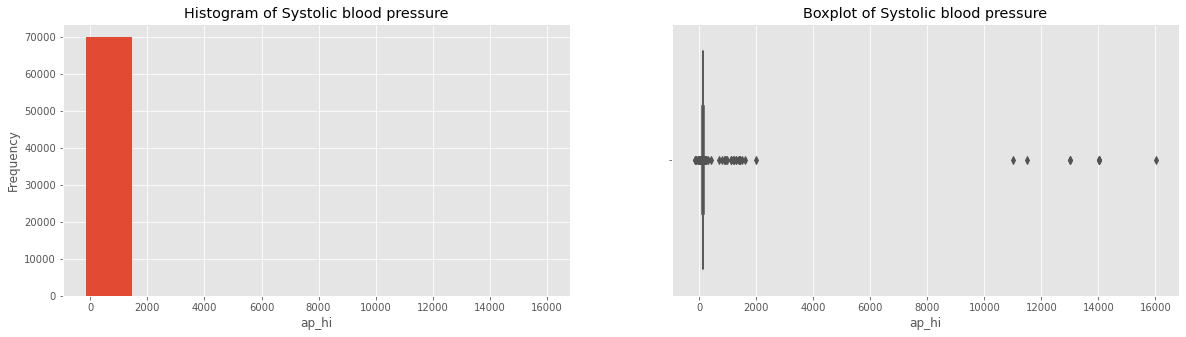

In [902]:

fig_4 = plt.figure(1, figsize=(20, 5))

chart_1 = fig_4.add_subplot(121)
chart_2 = fig_4.add_subplot(122)

chart_1.hist(df_clean["ap_hi"])
chart_1.xaxis.set_major_locator(MaxNLocator(integer=True))
chart_1.set_title('Histogram of Systolic blood pressure')
chart_1.set_xlabel('ap_hi')
chart_1.set_ylabel('Frequency')

sns.boxplot(x="ap_hi", data=df_clean, ax=chart_2)
chart_2.xaxis.set_major_locator(MaxNLocator(integer=True))
chart_2.set_title('Boxplot of Systolic blood pressure')
chart_2.set_xlabel('ap_hi')


plt.show()

The distribution of the `Systolic blood pressure` was quite unusual with several readings that were likely erroneous.

In [903]:
df_clean["ap_hi"].sample(10)

id
71874    120
83105    120
70079    120
81644    130
56106    120
12855    130
69533    120
47701    120
6697     100
20197    120
Name: ap_hi, dtype: int64

A random sample show values within the expected range.

In [904]:
df_clean["ap_hi"].sort_values()

id
50055     -150
34295     -140
66571     -120
36025     -120
22881     -115
         ...  
36339    14020
66998    14020
67502    14020
36414    14020
58374    16020
Name: ap_hi, Length: 69976, dtype: int64

But there were negative values and extremely high ones that should be reviewed.  We'll address these outliers later within the imputation section.

In [905]:
# df_clean = df_clean[~(df_clean['ap_hi'] < 40) & (df_clean['ap_hi'] < 300)]
# df_clean.shape[0]

#### Diastolic blood pressure (ap_lo)

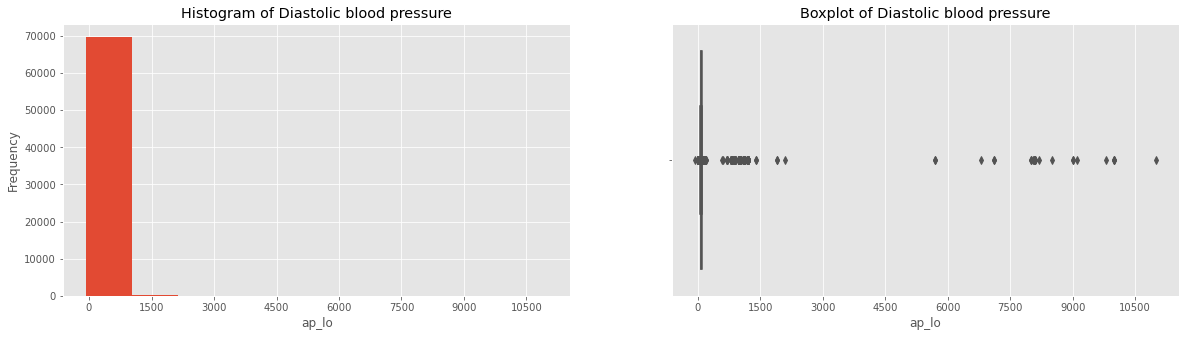

In [906]:

fig_5 = plt.figure(1, figsize=(20, 5))

chart_1 = fig_5.add_subplot(121)
chart_2 = fig_5.add_subplot(122)

chart_1.hist(df_clean["ap_lo"])
chart_1.xaxis.set_major_locator(MaxNLocator(integer=True))
chart_1.set_title('Histogram of Diastolic blood pressure')
chart_1.set_xlabel('ap_lo')
chart_1.set_ylabel('Frequency')

sns.boxplot(x="ap_lo", data=df_clean, ax=chart_2)
chart_2.xaxis.set_major_locator(MaxNLocator(integer=True))
chart_2.set_title('Boxplot of Diastolic blood pressure')
chart_2.set_xlabel('ap_lo')


plt.show()

In [907]:
df_clean["ap_lo"].sample(10)


id
61864     80
11498     80
83168     80
50539    100
24693     80
70696     80
4882      80
33910     80
98871     70
23334     80
Name: ap_lo, dtype: int64

In [908]:
df_clean["ap_lo"].sort_values()

id
85816      -70
98095        0
45400        0
75007        0
81298        0
         ...  
62058     9800
34098    10000
3352     10000
97907    10000
61901    11000
Name: ap_lo, Length: 69976, dtype: int64

The same technique should be applied to the `ap_lo` feature.

### Categorical Variables

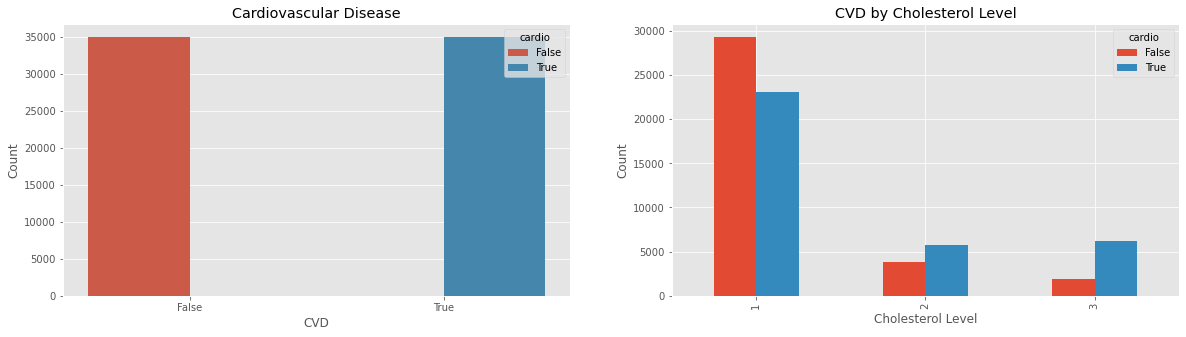

In [909]:
fig_0 = plt.figure(1, figsize=(20, 5))

chart_1 = fig_0.add_subplot(121)
chart_2 = fig_0.add_subplot(122)

sns.countplot(x="cardio", hue="cardio", data=df_clean, ax=chart_1)
# chart_1.legend(bbox_to_anchor=(1,1), title='CVD')
chart_1.set_title('Cardiovascular Disease')
chart_1.set_xlabel('CVD')
chart_1.set_ylabel('Count')

pd.crosstab(df_clean["cholesterol"], df_clean["cardio"]).plot(kind="bar", ax=chart_2)
chart_2.set_title('CVD by Cholesterol Level')
chart_2.set_xlabel('Cholesterol Level')
chart_2.set_ylabel('Count')


plt.show()

The Cardiovascular Disease (CVD) response variable is equally distributed.  The presence or absence of CVD does seem to change with the cholesterol levels.

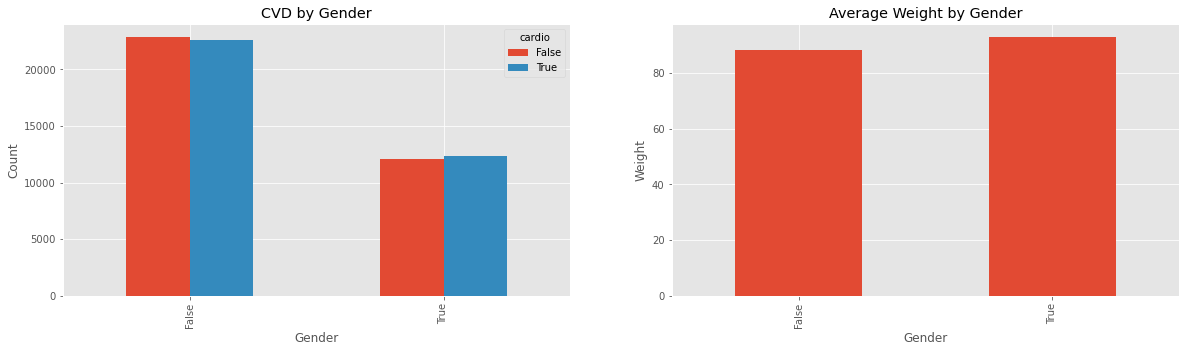

In [910]:

fig_6 = plt.figure(1, figsize=(20, 5))

chart_1 = fig_6.add_subplot(121)
chart_2 = fig_6.add_subplot(122)

pd.crosstab(df_clean["gender"], df_clean["cardio"]).plot(kind="bar", ax=chart_1)
chart_1.set_title('CVD by Gender')
chart_1.set_xlabel('Gender')
chart_1.set_ylabel('Count')

df_clean.groupby(['gender', 'height']).sum().reset_index()  

df_clean.groupby(['gender', 'weight']).mean().reset_index().groupby('gender')['weight'].mean().plot(kind='bar', ax=chart_2)
chart_2.set_title('Average Weight by Gender')
chart_2.set_xlabel('Gender')
chart_2.set_ylabel('Weight')


plt.show()

There are more subjects with the `label 0` in the study than those with `label 1`.

We're going to assume that label 1 is for male as the mean weight is slightly heigher for that category.

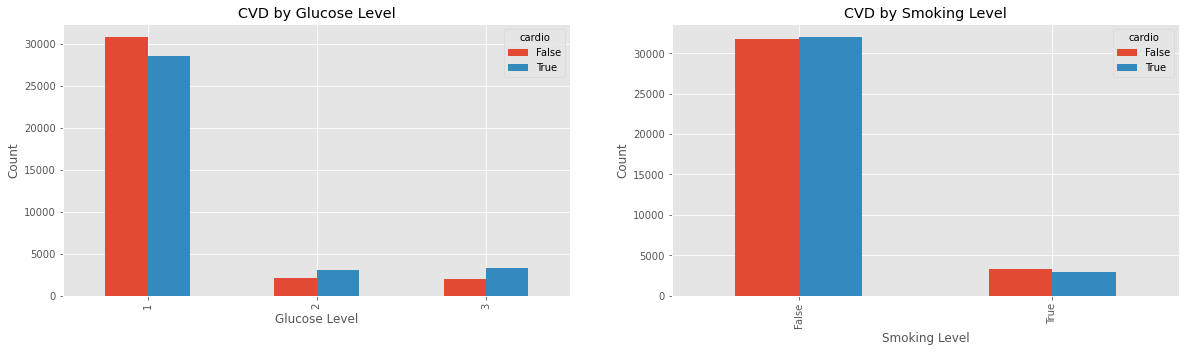

In [911]:
fig_7 = plt.figure(1, figsize=(20, 5))

chart_1 = fig_7.add_subplot(121)
chart_2 = fig_7.add_subplot(122)

pd.crosstab(df_clean["gluc"], df_clean["cardio"]).plot(kind="bar", ax=chart_1)
chart_1.set_title('CVD by Glucose Level')
chart_1.set_xlabel('Glucose Level')
chart_1.set_ylabel('Count')


pd.crosstab(df_clean["smoke"], df_clean["cardio"]).plot(kind="bar", ax=chart_2)
chart_2.set_title('CVD by Smoking Level')
chart_2.set_xlabel('Smoking Level')
chart_2.set_ylabel('Count')


plt.show()

The presence or absence of CVD also changes with the glucose levels but suprsingly not with smoking.

In [912]:
df_clean.groupby(['gluc', 'cardio']).size().unstack(fill_value=0)

cardio,False,True
gluc,,
1,30877,28578
2,2112,3078
3,2015,3316


There are only a few thousand entries within levels 2 and 3 of the Choleserol column.

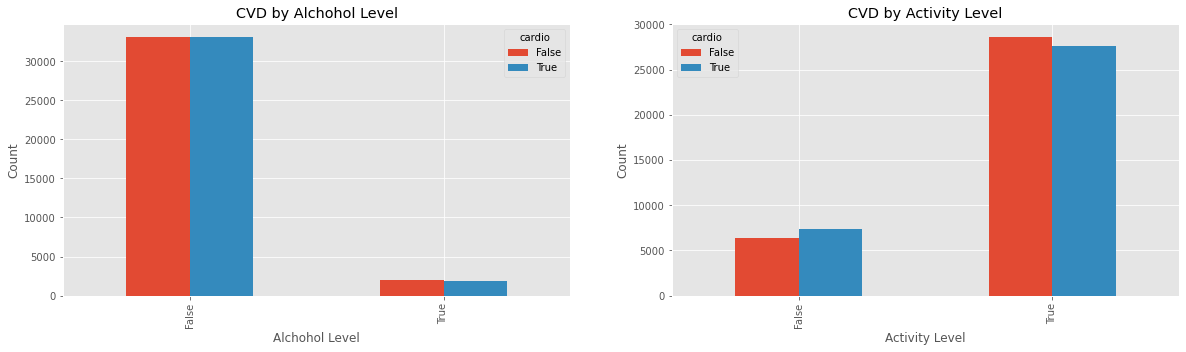

In [913]:
fig_8 = plt.figure(1, figsize=(20, 5))

chart_1 = fig_8.add_subplot(121)
chart_2 = fig_8.add_subplot(122)

pd.crosstab(df_clean["alco"], df_clean["cardio"]).plot(kind="bar", ax=chart_1)
chart_1.set_title('CVD by Alchohol Level')
chart_1.set_xlabel('Alchohol Level')
chart_1.set_ylabel('Count')


pd.crosstab(df_clean["active"], df_clean["cardio"]).plot(kind="bar", ax=chart_2)
chart_2.set_title('CVD by Activity Level')
chart_2.set_xlabel('Activity Level')
chart_2.set_ylabel('Count')


plt.show()

Also suprising is that the `Alcohol level` didn't seem to have an impact on the response variable.  The `Activity Level` did show good seperation.

## Imputation

#### Age

In [914]:
median_age = df_clean['age'].median()

In [915]:
age_outlier_ids = df_clean.index[(np.abs(df_clean['age'] - df_clean['age'].mean()) > (3 * df_clean['age'].std()))]

In [916]:
df_clean.loc[df_clean.index.isin(age_outlier_ids), "age"] = median_age

In [917]:
df_clean.loc[df_clean.index.isin(age_outlier_ids)].head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
8850,54.0,False,175,59.0,120,80,1,1,False,False,True,False
31922,54.0,True,175,92.0,100,60,1,1,False,False,True,False
43842,54.0,False,159,59.0,120,80,1,1,False,False,True,False
79749,54.0,False,160,59.0,110,70,1,1,False,False,True,False


We've imputed observations with an `age` of more than `three standard deviations` from the mean with the median value. (~4 observations in total)  These may well have been valid observations but we wanted our model to extend well to other new and unseen data sets.

#### Height

In [918]:
median_height = df_clean['height'].median()

In [919]:
height_outlier_ids = df_clean.index[(np.abs(df_clean['height'] - df_clean['height'].mean()) > (3 * df_clean['height'].std()))]


In [920]:
df_clean.loc[df_clean.index.isin(height_outlier_ids), "height"] = median_height

In [921]:
df_clean.loc[df_clean.index.isin(height_outlier_ids)].head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
309,60.0,True,165.0,55.0,120,80,1,1,False,False,True,False
1432,42.0,True,165.0,111.0,148,86,1,1,False,False,True,True
1554,61.0,True,165.0,68.0,120,80,1,1,False,False,True,True
3049,44.0,True,165.0,74.0,140,90,1,1,True,True,True,True
3399,62.0,True,165.0,52.0,140,100,1,1,False,False,True,True


We've imputed observations with a `height` more than three standard deviations from the mean with the median value. (~287 observations in total)

#### Weight

In [922]:
median_weight = df_clean['weight'].median()

In [923]:
weight_outlier_ids = df_clean.index[(np.abs(df_clean['weight'] - df_clean['weight'].mean()) > (3 * df_clean['weight'].std()))]


In [924]:
df_clean.loc[df_clean.index.isin(weight_outlier_ids), "weight"] = median_weight


In [925]:
df_clean.loc[df_clean.index.isin(weight_outlier_ids)].head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
474,58.0,False,157.0,72.0,120,80,1,1,False,False,True,True
552,46.0,True,165.0,72.0,120,80,1,1,False,False,True,False
618,46.0,False,186.0,72.0,130,70,1,1,False,False,False,False
634,58.0,True,178.0,72.0,160,90,1,3,False,False,True,True
846,40.0,False,164.0,72.0,130,90,1,1,False,False,False,False


The same method was applied to the 702 `weight` outliers.

#### Systolic blood pressure (ap_hi)

In [926]:
median_ap_hi = df_clean['ap_hi'].median()

In [927]:
ap_hi_outlier_ids = df_clean.index[(np.abs(df_clean['ap_hi'] - df_clean['ap_hi'].mean()) > (3 * df_clean['ap_hi'].std()))]


In [928]:
df_clean.loc[df_clean.index.isin(ap_hi_outlier_ids), "ap_hi"] = median_ap_hi

In [929]:
df_clean.loc[df_clean.index.isin(ap_hi_outlier_ids)].head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
2654,41.0,False,160.0,60.0,120.0,60,1,1,False,False,True,False
2845,62.0,True,167.0,59.0,120.0,0,1,1,False,False,True,False
6822,40.0,False,168.0,63.0,120.0,60,2,1,False,False,True,False
11089,58.0,False,175.0,80.0,120.0,90,1,1,False,False,True,True
12710,52.0,False,164.0,75.0,120.0,80,2,1,False,False,True,True


In [930]:
ap_hi_outlier_ids2 = df_clean.index[(df_clean['ap_hi'] < 40) | (df_clean['ap_hi'] > 300)]


In [931]:
df_clean.loc[df_clean.index.isin(ap_hi_outlier_ids2), "ap_hi"] = median_ap_hi

Even after handling the `ap_hi` outliers through the standard deviation method, there were still some unusual entries that were manually addressed.  (readings less that 40 or greater than 300)

#### Diastolic blood pressure (ap_lo)

In [932]:
median_ap_lo = df_clean['ap_lo'].median()

In [933]:
ap_lo_outlier_ids = df_clean.index[(np.abs(df_clean['ap_lo'] - df_clean['ap_lo'].mean()) > (3 * df_clean['ap_lo'].std()))]

In [934]:
df_clean.loc[df_clean.index.isin(ap_lo_outlier_ids), "ap_lo"] = median_ap_lo

In [935]:
df_clean.loc[df_clean.index.isin(ap_lo_outlier_ids)].head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
314,48.0,True,183.0,98.0,160.0,80.0,1,2,True,False,True,True
334,60.0,True,157.0,60.0,160.0,80.0,2,1,False,False,False,True
357,50.0,False,150.0,83.0,140.0,80.0,1,1,False,False,True,True
458,64.0,False,176.0,63.0,160.0,80.0,2,2,False,False,False,True
482,51.0,False,154.0,81.0,140.0,80.0,2,1,False,False,True,True


In [936]:
ap_lo_outlier_ids2 = df_clean.index[(df_clean['ap_lo'] < 40) | (df_clean['ap_lo'] > 300)]

In [937]:
df_clean.loc[df_clean.index.isin(ap_lo_outlier_ids2), "ap_lo"] = median_ap_lo

The `ap_lo` feature needed similar processing.

In [938]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69976 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          69976 non-null  float64
 1   gender       69976 non-null  bool   
 2   height       69976 non-null  float64
 3   weight       69976 non-null  float64
 4   ap_hi        69976 non-null  float64
 5   ap_lo        69976 non-null  float64
 6   cholesterol  69976 non-null  int64  
 7   gluc         69976 non-null  int64  
 8   smoke        69976 non-null  bool   
 9   alco         69976 non-null  bool   
 10  active       69976 non-null  bool   
 11  cardio       69976 non-null  bool   
dtypes: bool(5), float64(5), int64(2)
memory usage: 7.1 MB


# Exceptional Work



#### Store feature matrix as an ndarray

In [939]:
# Full Model
X_cols = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']


# X_cols = ['age', 'male', 'female', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']


# *dcrouthamel - test with new features
# X_cols = ['age', 'gender', 'bmiGrp', 'bp', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
X = df_clean[X_cols] # .to_numpy()

In [940]:
type(X)

pandas.core.frame.DataFrame

#### Store response vector

In [941]:
y = df_clean['cardio'] # .to_numpy()

## Logistic Regression

Full Model consisting of all features with standardized values.


In [942]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# logreg = LogisticRegression()
# logreg.fit(X_train, y_train)
logreg = LogisticRegression()
logreg.fit(X_train_std, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [943]:
y_pred = logreg.predict(X_test_std)
print('Accuracy of the log reg model on the test data: {:.2f}'.format(logreg.score(X_test_std, y_test)))

Accuracy of the log reg model on the test data: 0.73


In [944]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[8186 2341]
 [3308 7158]]


In [945]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

precision    recall  f1-score   support

       False       0.71      0.78      0.74     10527
        True       0.75      0.68      0.72     10466

    accuracy                           0.73     20993
   macro avg       0.73      0.73      0.73     20993
weighted avg       0.73      0.73      0.73     20993



In [946]:
from IPython.display import Markdown as md

In [947]:
### Logistic Regression Metrics

md(f"**True Positives:**  {confusion_matrix[1, 1]} \n\n **True Negatives:**  {confusion_matrix[0, 0]} \n\n **False Positives:**  {confusion_matrix[0, 1]} \n\n **False Negatives:**  {confusion_matrix[1, 0]}")


**True Positives:**  7158 

 **True Negatives:**  8186 

 **False Positives:**  2341 

 **False Negatives:**  3308

In [948]:
md(f"**Accuracy:**  { format(( confusion_matrix[1, 1] + confusion_matrix[0, 0] ) / confusion_matrix.sum(), '.3f')}\n\n-how often we were correct overall")

**Accuracy:**  0.731

-how often we were correct overall

In [949]:
md(f"**Error:**  { format(( confusion_matrix[0, 1] + confusion_matrix[1, 0] ) / confusion_matrix.sum(), '.3f')}\n\n-how often we were incorrect overall")

**Error:**  0.269

-how often we were incorrect overall

In [950]:
md(f"**Sensitivity/ Recall:**  { format(( confusion_matrix[1, 1] ) / confusion_matrix[1].sum(axis=0), '.3f')}\n\n-when the patient actually had CVD, how often were we correct")

**Sensitivity/ Recall:**  0.684

-when the patient actually had CVD, how often were we correct

In [951]:
md(f"**Specificity:**  { format(( confusion_matrix[0, 0] ) / confusion_matrix[0].sum(), '.3f')}\n\n-when the patient did not had CVD, how often were we correct")

**Specificity:**  0.778

-when the patient did not had CVD, how often were we correct

In [952]:
md(f"**False Postive Rate:**  { format(( confusion_matrix[0, 1] ) / ( confusion_matrix[0, 0] + confusion_matrix[0, 1] ), '.3f')}\n\n-when the patient did not had CVD, how often were we incorrect")

**False Postive Rate:**  0.222

-when the patient did not had CVD, how often were we incorrect

In [953]:
md(f"**Precision:**  { format(( confusion_matrix[1, 1] ) / ( confusion_matrix[1, 1] + confusion_matrix[0, 1] ), '.3f')}\n\n-how precise were we when classifying the patient as having CVD")

**Precision:**  0.754

-how precise were we when classifying the patient as having CVD

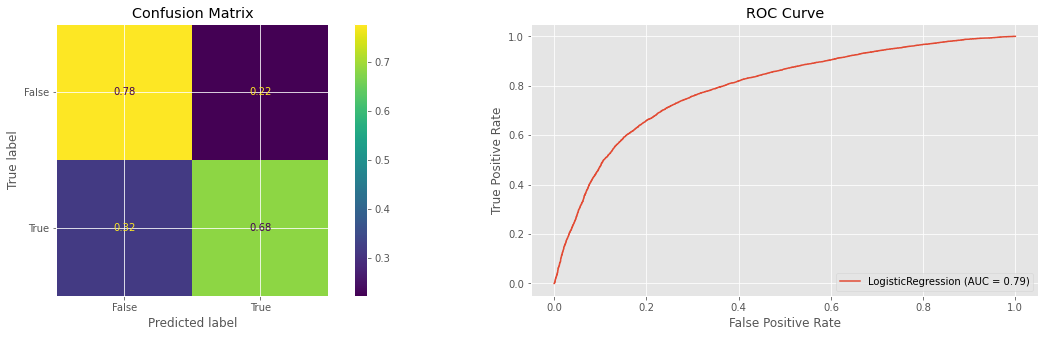

In [954]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve

fig = plt.figure(1, figsize=(20, 5))

chart_1 = fig.add_subplot(121)
chart_2 = fig.add_subplot(122)

plot_confusion_matrix(logreg, X_test_std, y_test, normalize='true', ax=chart_1)
chart_1.set_title('Confusion Matrix')

plot_roc_curve(logreg, X_test_std, y_test, ax=chart_2)
chart_2.set_title('ROC Curve')

plt.show()